In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

import functions as fx

from matplotlib import rc
from matplotlib import rcParams

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

pad = 12
rcParams['xtick.major.pad'] = pad
rcParams['ytick.major.pad'] = pad

dpi = 200

%matplotlib inline

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

from galpy.orbit import Orbit
from galpy import potential

from galpy.util import bovy_conversion

In [5]:
ts = np.linspace(0,10,10000)*u.Gyr

## parameters for Hercules

gaiasys = 0.035

ra = 247.76639099999994
dec = 12.794125466666669
dist = 132.
dist_err = 6. 

vlos = 45.

pmra, pmra_e = -0.16, 0.08
pmdec, pmdec_e = -0.41, 0.06


# Fiducial model of Herc orbit

In [6]:
#parameterizing MW halo using params from McMillan 2017

c = 1.0
ro = 8.2
vo = 232.8

tp_amp= potential.TriaxialNFWPotential(amp=1.,a=2.,c=c)
mvir= tp_amp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12. 
tp= potential.TriaxialNFWPotential(amp=1.3/mvir,a=2.,c=c)
# amp = (0.8 x 10^12 Msun: desired mass) / (mvir x 10^12: mass for amp=1)
print('Mass of halo: ' + str(np.round(tp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12.,2)) + ' 10^12 Msun')

bp= potential.PowerSphericalPotentialwCutoff(alpha=1.8,rc=1.9/ro,normalize=0.05) 
mp= potential.MiyamotoNagaiPotential(a=3./ro,b=0.28/ro,normalize=.6)

pot_fid = [tp, bp, mp]

0.2001449702847074
1.3000000001287741


In [7]:
ts_small = np.linspace(0,5,5000)*u.Gyr

fid = Orbit([ra*u.degree,
            dec*u.degree,
            dist*u.kpc,
            pmra*u.mas/u.yr,
            pmdec*u.mas/u.yr,
            vlos*u.km/u.s],
            radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

fid_flip = fid.flip() 
fid_flip.integrate(ts_small,pot_fid)
fid_flip.flip(inplace=True)
fid.integrate(ts_small,pot_fid)

In [15]:
minix = np.argmin(fid_flip.r(ts_small)) 
print('In fiducial model from McMillan 2017, Hercules made pericentric passage ' + 
      ("%.2f" % ts_small[minix].value) + ' Gyr ago, approaching ' + ("%.2f" % fid_flip.r(ts_small)[minix]) + 
      ' kpc of the Milky Way Center.')

In fiducial model from McMillan 2017, Hercules made pericentric passage 0.54 Gyr ago, approaching 41.53 kpc of the Milky Way Center.


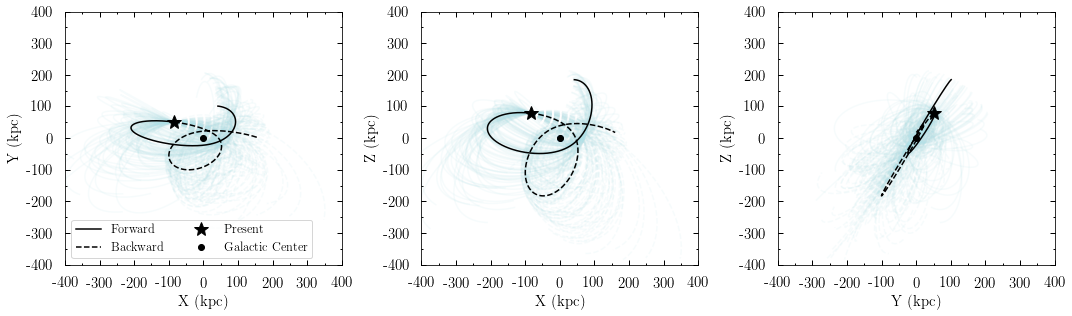

In [30]:
fig, ax = plt.subplots(1,3,figsize=(15,4.5))

ax[0].plot(fid.x(ts_small),fid.y(ts_small),color='black',ls='-',label='Forward', zorder=1000)
ax[0].plot(fid_flip.x(ts_small),fid_flip.y(ts_small),color='black',ls='--',label='Backward', zorder=1000)
ax[0].plot(fid_flip.x(ts_small)[0],fid_flip.y(ts_small)[0],color='black',ls='None',zorder=1000,
          marker='*',markersize=15, label='Present')
ax[0].set_xlabel('X (kpc)',fontsize=15)
ax[0].set_ylabel('Y (kpc)',fontsize=15)

ax[1].plot(fid.x(ts_small),fid.z(ts_small),color='black',ls='-',zorder=1000)
ax[1].plot(fid_flip.x(ts_small),fid_flip.z(ts_small),color='black',ls='--',zorder=1000)
ax[1].plot(fid_flip.x(ts_small)[0],fid_flip.z(ts_small)[0],color='black',ls='None',zorder=1000,
          marker='*',markersize=15)
ax[1].set_xlabel('X (kpc)',fontsize=15)
ax[1].set_ylabel('Z (kpc)',fontsize=15)
ax[1].plot(0,0,marker='o',ls='None')


ax[2].plot(fid.y(ts_small),fid.z(ts_small),color='black',ls='-',zorder=1000)
ax[2].plot(fid_flip.y(ts_small),fid_flip.z(ts_small),color='black',ls='--',zorder=1000)
ax[2].plot(fid_flip.y(ts_small)[0],fid_flip.z(ts_small)[0],color='black',ls='None',zorder=1000,
          marker='*',markersize=15, label='Present')
ax[2].set_xlabel('Y (kpc)',fontsize=15)
ax[2].set_ylabel('Z (kpc)',fontsize=15)
ax[2].plot(0,0,marker='o',ls='None')

major_tick_length = 5
major_tick_width = 1
minor_tick_length = 2
minor_tick_width = 1

np.random.seed(4747)

plot_sampsize = 100

pmra_plot = np.random.normal(pmra, np.sqrt(np.square(pmra_e) + np.square(gaiasys)),plot_sampsize)
pmde_plot = np.random.normal(pmdec, np.sqrt(np.square(pmdec_e) + np.square(gaiasys)), plot_sampsize)

for k in range(plot_sampsize):
    orb = Orbit([ra*u.degree,
            dec*u.degree,
            dist*u.kpc,
            pmra_plot[k]*u.mas/u.yr,
            pmde_plot[k]*u.mas/u.yr,
            vlos*u.km/u.s],
            radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

    orb_flip = orb.flip() 
    orb_flip.integrate(ts_small,pot_fid)
    orb_flip.flip(inplace=True)
    orb.integrate(ts_small,pot_fid)
    
    ax[0].plot(orb_flip.x(ts_small), orb_flip.y(ts_small),ls='--',color='powderblue',alpha=0.1)
    ax[1].plot(orb_flip.x(ts_small), orb_flip.z(ts_small),ls='--',color='powderblue',alpha=0.1)
    ax[2].plot(orb_flip.y(ts_small), orb_flip.z(ts_small),ls='--',color='powderblue',alpha=0.1)

    ax[0].plot(orb.x(ts_small), orb.y(ts_small),ls='-',color='powderblue',alpha=0.1)
    ax[1].plot(orb.x(ts_small), orb.z(ts_small),ls='-',color='powderblue',alpha=0.1)
    ax[2].plot(orb.y(ts_small), orb.z(ts_small),ls='-',color='powderblue',alpha=0.1)


for i in range(3):
    ax[i].set_xlim(-400,400)
    ax[i].set_ylim(-400,400)
    ax[i].plot(0,0,marker='o',ls='None',label='Galactic Center',color='black')
    
    ax[i].xaxis.set_major_locator(MultipleLocator(100))
    ax[i].xaxis.set_minor_locator(MultipleLocator(50))

    ax[i].yaxis.set_major_locator(MultipleLocator(100))
    ax[i].yaxis.set_minor_locator(MultipleLocator(50))

    ax[i].set_xticklabels(np.round(np.arange(-500,500,100),0),fontsize=15)
    ax[i].set_yticklabels(np.round(np.arange(-500,500,100),0),fontsize=15)

    ax[i].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                 length = major_tick_length, width = major_tick_width)
    ax[i].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='minor',
                  length = minor_tick_length, width = minor_tick_width)

ax[0].legend(fontsize=12.5,loc='lower left',ncol=2)

fig.tight_layout()

fig.savefig('Herc_fiducial_M17_fig9.pdf',dpi=dpi,
            bbox_inches='tight')

# Hercules Orbit, On-Sky Position

In [29]:
# setting up kuepper+17 orbit

ts_small = np.linspace(0,5,5000)*u.Gyr

kup = Orbit([ra*u.degree,
            dec*u.degree,
            dist*u.kpc,
            -0.21*u.mas/u.yr,
            -0.24*u.mas/u.yr,
            vlos*u.km/u.s],
            radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

kup_flip = kup.flip() 
kup_flip.integrate(ts_small,pot_fid)
kup_flip.flip(inplace=True)
kup.integrate(ts_small,pot_fid)



test = Orbit([ra*u.degree,
            dec*u.degree,
            dist*u.kpc,
            0*u.mas/u.yr,
            0*u.mas/u.yr,
            vlos*u.km/u.s],
            radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

test_flip = test.flip() 
test_flip.integrate(ts_small,pot_fid)
test_flip.flip(inplace=True)
test.integrate(ts_small,pot_fid)

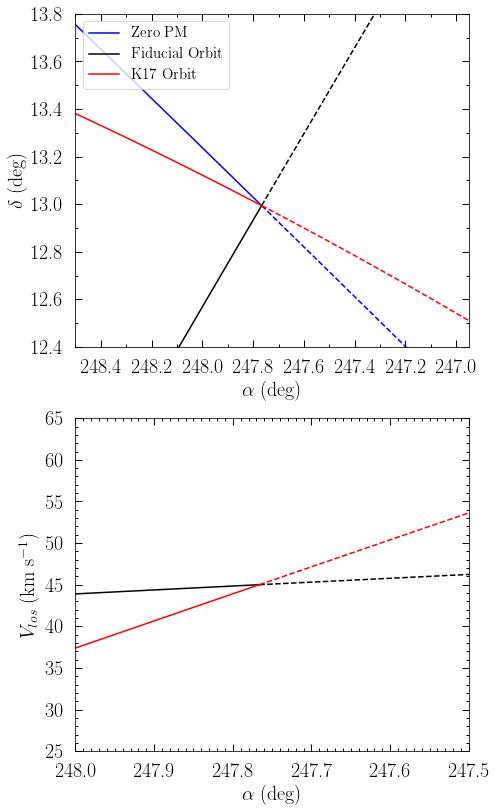

In [30]:
hercclr = 'mediumblue'
hercsymb = 'o'
hercmkrsize = 7.5

r15_clr = 'lightcoral'
r15_symb = 'o'
r15_mkrsize= 15

k15_clr = 'red'

xmax = 248.5
xmin = 246.95
ymax = 13.6
ymin = 12.2

axlab = 20
ticklab = 20

factor = np.abs((xmax-xmin)/(ymax-ymin))

fig, ax = plt.subplots(2,1,figsize=(7,1.8*7/factor))#,sharex=True)

np.random.seed(4747)

plot_sampsize = 100

pmra_plot = np.random.normal(pmra, np.sqrt(np.square(pmra_e) + np.square(gaiasys)),plot_sampsize)
pmde_plot = np.random.normal(pmdec, np.sqrt(np.square(pmdec_e) + np.square(gaiasys)), plot_sampsize)

ts_small = np.linspace(0,3,5000)*u.Gyr

# for k in range(plot_sampsize):
#     if k == 0:
#         orb = Orbit([ra*u.degree,
#                 dec*u.degree,
#                 dist*u.kpc,
#                 pmra_plot[k]*u.mas/u.yr,
#                 pmde_plot[k]*u.mas/u.yr,
#                 vlos*u.km/u.s],
#                 radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

#         orb_flip = orb.flip() 
#         orb_flip.integrate(ts_small,pot_fid)
#         orb_flip.flip(inplace=True)
#         orb.integrate(ts_small,pot_fid)

#         ax[0].plot(orb_flip.ra(ts_small)[0:200], orb_flip.dec(ts_small)[0:200],ls='--',color='powderblue',alpha=0.25)
#         ax[1].plot(orb_flip.ra(ts_small)[0:200], orb_flip.vlos(ts_small)[0:200],ls='--',color='powderblue',alpha=0.25)

#         ax[0].plot(orb.ra(ts_small)[0:200], orb.dec(ts_small)[0:200],ls='-',color='powderblue',alpha=0.25,
#                   label='Possible Orbits')
#         ax[1].plot(orb.ra(ts_small)[0:200], orb.vlos(ts_small)[0:200],ls='-',color='powderblue',alpha=0.25)   
        
#     else:
#         orb = Orbit([ra*u.degree,
#                 dec*u.degree,
#                 dist*u.kpc,
#                 pmra_plot[k]*u.mas/u.yr,
#                 pmde_plot[k]*u.mas/u.yr,
#                 vlos*u.km/u.s],
#                 radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

#         orb_flip = orb.flip() 
#         orb_flip.integrate(ts_small,pot_fid)
#         orb_flip.flip(inplace=True)
#         orb.integrate(ts_small,pot_fid)

#         ax[0].plot(orb_flip.ra(ts_small)[0:200], orb_flip.dec(ts_small)[0:200],ls='--',color='powderblue',alpha=0.25)
#         ax[1].plot(orb_flip.ra(ts_small)[0:200], orb_flip.vlos(ts_small)[0:200],ls='--',color='powderblue',alpha=0.25)

#         ax[0].plot(orb.ra(ts_small)[0:200], orb.dec(ts_small)[0:200],ls='-',color='powderblue',alpha=0.25)
#         ax[1].plot(orb.ra(ts_small)[0:200], orb.vlos(ts_small)[0:200],ls='-',color='powderblue',alpha=0.25)


ax[0].plot(test.ra(ts_small),test.dec(ts_small),color='blue',ls='-',label='Zero PM')
ax[0].plot(test_flip.ra(ts_small),test_flip.dec(ts_small),color='blue',ls='--',label='')

ax[0].plot(fid.ra(ts_small),fid.dec(ts_small),color='black',ls='-',label='Fiducial Orbit')
ax[0].plot(fid_flip.ra(ts_small),fid_flip.dec(ts_small),color='black',ls='--',label='')

ax[0].plot(kup.ra(ts_small),kup.dec(ts_small),color=k15_clr,ls='-',label='K17 Orbit')
ax[0].plot(kup_flip.ra(ts_small),kup_flip.dec(ts_small),color=k15_clr,ls='--',label='')

ax[0].legend(fontsize=15,loc='upper left')

ax[0].set_xlim(xmax, xmin)
ax[0].set_ylim(ymin, ymax)
ax[0].set_xlabel(r'$\alpha$ (deg)', fontsize=axlab)
ax[0].set_ylabel(r'$\delta$ (deg)', fontsize=axlab)

ax[1].plot(fid.ra(ts_small),fid.vlos(ts_small),color='black',ls='-')
ax[1].plot(fid_flip.ra(ts_small),fid_flip.vlos(ts_small),color='black',ls='--')

ax[1].plot(kup.ra(ts_small),kup.vlos(ts_small),color=k15_clr,ls='-')
ax[1].plot(kup_flip.ra(ts_small),kup_flip.vlos(ts_small),color=k15_clr,ls='--')


ax[1].set_xlim(248., 247.5)
ax[1].set_ylim(25,65)
ax[1].set_xlabel(r'$\alpha$ (deg)', fontsize=axlab)
ax[1].set_ylabel(r'$V_{los}$ (km s$^{-1}$)',fontsize=axlab)

ax[0].xaxis.set_major_locator(MultipleLocator(0.2))
ax[0].xaxis.set_minor_locator(MultipleLocator(0.1))

ax[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax[1].xaxis.set_minor_locator(MultipleLocator(0.01))

ax[0].set_xticklabels(np.round(np.arange(246.8,248.6,0.2),1),fontsize=ticklab)
ax[1].set_xticklabels(np.round(np.arange(247.4,248.1,0.1),1),fontsize=ticklab)

ax[0].yaxis.set_major_locator(MultipleLocator(0.2))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))

ax[1].yaxis.set_major_locator(MultipleLocator(5))
ax[1].yaxis.set_minor_locator(MultipleLocator(1))

ax[0].set_yticklabels(np.round(np.arange(12.2,13.8,0.2),1),fontsize=ticklab)
ax[1].set_yticklabels(np.round(np.arange(20,70,5),0),fontsize=ticklab)

major_tick_length = 7
major_tick_width = 1
minor_tick_length = 3
minor_tick_width = 1

for i in range(2):
    ax[i].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                 length = major_tick_length, width = major_tick_width)
    ax[i].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='minor',
                length = minor_tick_length, width = minor_tick_width)

fig.tight_layout()

# fig.savefig(pprdir + 'Herc_observed.pdf',dpi=dpi,bbox_inches='tight')

# Testing effects of halo flattening on pericenter of fiducial orbit

In [36]:
ts_small = np.linspace(0,5,5000)*u.Gyr

c_grid = np.array([0.5,0.6,0.7,0.8,0.9,1.0]) 

orb_forward = []
orb_backward = []
        
for i in range(c_grid.size):
    tp_amp= potential.TriaxialNFWPotential(amp=1.,a=2.,c=c_grid[i])
    mvir= tp_amp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12. 
    
    tp= potential.TriaxialNFWPotential(amp=1.3/mvir,a=2.,c=c_grid[i]) 
    print('Mass of Halo: ' + np.str(np.round(tp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12., 2)) + ' 10^12 Solar masses')

    pot = [tp,bp,mp]
    orb = Orbit([ra*u.degree,
                dec*u.degree,
                dist*u.kpc,
                pmra*u.mas/u.yr,
                pmdec*u.mas/u.yr,
                vlos*u.km/u.s],
            radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

    orb_flip = orb.flip() 
    orb_flip.integrate(ts,pot)
    orb_flip.flip(inplace=True)
    orb.integrate(ts,pot)
    
    orb_forward.append(orb)
    orb_backward.append(orb_flip)

Mass of Halo: 1.3 10^12 Solar masses
Mass of Halo: 1.3 10^12 Solar masses
Mass of Halo: 1.3 10^12 Solar masses
Mass of Halo: 1.3 10^12 Solar masses
Mass of Halo: 1.3 10^12 Solar masses
Mass of Halo: 1.3 10^12 Solar masses


In [37]:
peri = np.array([orb_backward[0].rperi(),orb_backward[1].rperi(),orb_backward[2].rperi(),
       orb_backward[3].rperi(),orb_backward[4].rperi(),orb_backward[5].rperi()])

(array([34., 35., 36., 37., 38., 39., 40., 41., 42.]),
 <a list of 9 Text yticklabel objects>)

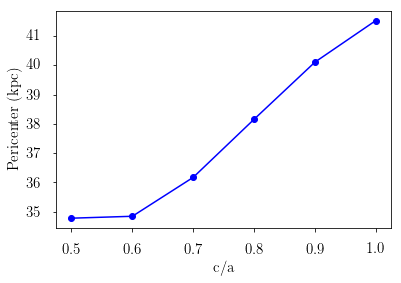

In [38]:
plt.plot(c_grid,peri,marker='o',color='blue')
plt.xlabel('c/a',fontsize=15)
plt.ylabel('Pericenter (kpc)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Reading in the results of the MC


In [8]:
# these are the arrays used to generate the samples of the MCMC

np.random.seed(4747)

sampsize=5000

dist_ar = np.random.normal(dist, dist_err, sampsize)
pmra_ar = np.random.normal(pmra, np.sqrt(np.square(pmra_e) + np.square(gaiasys)),sampsize)
pmde_ar = np.random.normal(pmdec, np.sqrt(np.square(pmdec_e) + np.square(gaiasys)), sampsize)

mass_ar = np.random.normal(1.3, 0.3, sampsize) 
c_grid = np.array([0.5,0.6,0.7,0.8,0.9,1.0]) 

In [9]:
mc_res = pd.read_csv('herc_peric.txt')

In [10]:
# different flattening parameters 

c05 = mc_res[(mc_res['c'] < 0.55) & (mc_res['c'] > 0.45)].reset_index().drop(['index'],axis=1)
c06 = mc_res[(mc_res['c'] < 0.65) & (mc_res['c'] > 0.55)].reset_index().drop(['index'],axis=1)
c07 = mc_res[(mc_res['c'] < 0.75) & (mc_res['c'] > 0.65)].reset_index().drop(['index'],axis=1)
c08 = mc_res[(mc_res['c'] < 0.85) & (mc_res['c'] > 0.75)].reset_index().drop(['index'],axis=1)
c09 = mc_res[(mc_res['c'] < 0.95) & (mc_res['c'] > 0.85)].reset_index().drop(['index'],axis=1)
c10 = mc_res[(mc_res['c'] < 1.05) & (mc_res['c'] > 0.95)].reset_index().drop(['index'],axis=1)

# Monte Carlo Results for Spherical Halo

In [22]:
p50val = np.percentile(c10['Peri'],50)
p84val = np.percentile(c10['Peri'],84)
p16val = np.percentile(c10['Peri'],16)

p50val_str = "%.2f" % p50val
p_up = "%.2f" % (p84val - p50val)
p_down = "%.2f" % (p50val - p16val)

print("The pericenter of Hercules's orbit is " + p50val_str + ', +' + p_up + '/-' + p_down + 'kpc')

p_55 = str(np.round((np.where(c10['Peri'] < 55)[0].size/c10['Peri'].size)*100, 2))

print('There is a ' + p_55 + "% chance that the pericenter of Hercules's orbit is less than 55 kpc.")

The pericenter of Hercules's orbit is 47.22, +27.00/-21.59kpc
There is a 61.76% chance that the pericenter of Hercules's orbit is less than 55 kpc.


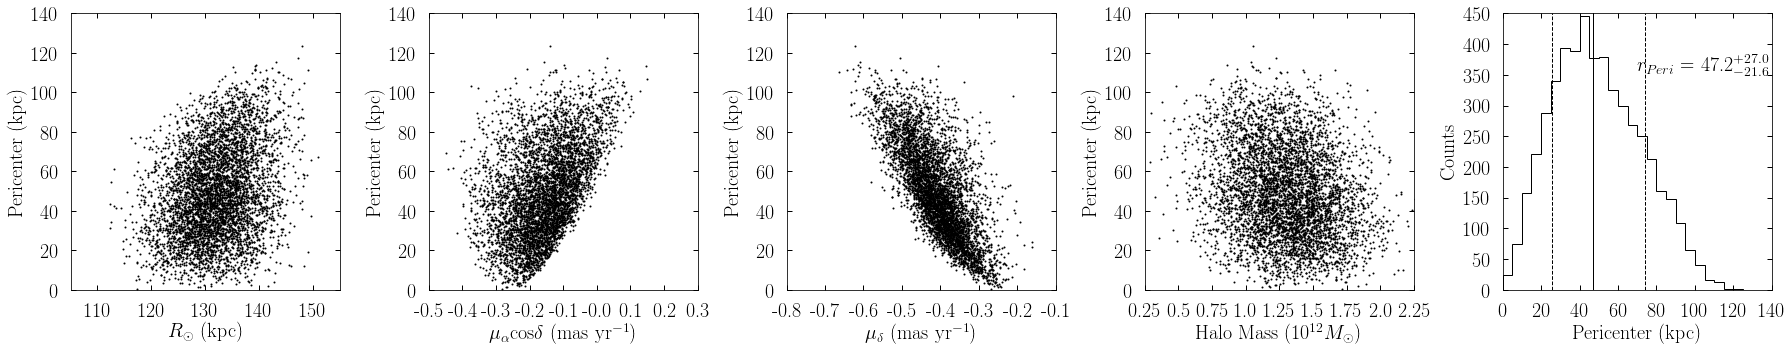

In [23]:
axesf = 20
tickf = 20

fig, ax = plt.subplots(1,5,figsize=(25,5))

ax[0].scatter(dist_ar, c10['Peri'],s=1,c='black')
ax[1].scatter(pmra_ar, c10['Peri'],s=1,c='black')
ax[2].scatter(pmde_ar, c10['Peri'],s=1,c='black')
ax[3].scatter(mass_ar, c10['Peri'],s=1, c='black') #mass is in multiple of 10^12
ax[4].hist(c10['Peri'],bins=np.arange(0,145,5), histtype='step', stacked=True, fill=False,color='black')

ax[4].axvline(x=np.percentile(c10['Peri'],16),ls='--',lw=1,color='black')
ax[4].axvline(x=np.percentile(c10['Peri'],50),ls='-',lw=1,color='black')
ax[4].axvline(x=np.percentile(c10['Peri'],84),ls='--',lw=1,color='black')

ax[0].set_xlabel(r'$R_{\odot}$ (kpc)',fontsize=axesf)
ax[1].set_xlabel(r'$\mu_{\alpha}$cos$\delta$ (mas yr$^{-1}$)',fontsize=axesf)
ax[2].set_xlabel(r'$\mu_{\delta}$ (mas yr$^{-1}$)',fontsize=axesf)
ax[3].set_xlabel(r'Halo Mass (10$^{12} M_{\odot}$)',fontsize=axesf)
ax[4].set_xlabel(r'Pericenter (kpc)',fontsize=axesf)

ax[0].set_ylabel(r'Pericenter (kpc)',fontsize=axesf)
ax[1].set_ylabel(r'Pericenter (kpc)',fontsize=axesf)
ax[2].set_ylabel(r'Pericenter (kpc)',fontsize=axesf)
ax[3].set_ylabel(r'Pericenter (kpc)',fontsize=axesf)
ax[4].set_ylabel(r'Counts',fontsize=axesf)

major_tick_length = 5
major_tick_width = 1

ax[0].set_ylim(0,140)
ax[1].set_ylim(0,140)
ax[2].set_ylim(0,140)
ax[3].set_ylim(0,140)
ax[4].set_ylim(0,450)

for i in [0,1,2,3]:
    ax[i].yaxis.set_major_locator(MultipleLocator(20))
    ax[i].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                 length = major_tick_length, width = major_tick_width)
    ax[i].set_yticklabels(np.round(np.arange(-20,160,20),0),fontsize=tickf)
    
ax[4].set_yticklabels(np.round(np.arange(0,500,50),0),fontsize=tickf)

ax[4].tick_params(axis='both',direction='in',bottom='on',top='on',right='on',left='on',which='major',
                length = major_tick_length, width = major_tick_width)

ax[0].set_xlim(105,155)
ax[1].set_xlim(-0.5,0.3)
ax[2].set_xlim(-0.8,-0.1)
ax[3].set_xlim(0.25,2.25)
ax[4].set_xlim(0,140)

ax[0].set_xticklabels(np.round(np.arange(100,160,10),0),fontsize=tickf)
ax[1].set_xticklabels(np.round(np.arange(-0.5,0.4,0.1),1),fontsize=tickf)
ax[2].set_xticklabels(np.round(np.arange(-0.8,0.2,0.1),1),fontsize=tickf)
ax[3].set_xticklabels(np.round(np.arange(0.25,2.50,0.25),2),fontsize=tickf)
ax[4].set_xticklabels(np.round(np.arange(0,160,20),0),fontsize=tickf)

ax[4].text(70,350, r'$r_{Peri}$ = 47.2$^{+27.0}_{-21.6}$',fontsize=20)

fig.tight_layout()
fig.savefig('HercMC_M17_fig10.pdf',dpi=dpi,
            bbox_inches='tight')

# Testing the effects of halo flattening on the pericenter distribution

In [27]:
p16 = []
p50 = []
p84 = []
peri55 = []

df_ar = [c05,c06,c07,c08,c09,c10]

for i in range(len(df_ar)):
    perc_16 = np.percentile(df_ar[i]['Peri'],16)
    perc_50 = np.percentile(df_ar[i]['Peri'],50)
    perc_84 = np.percentile(df_ar[i]['Peri'],84)
    
    peri55ix = np.where(df_ar[i]['Peri'] < 55)[0]
    
    peri55.append(float(peri45ix.size)/float(df_ar[i]['Peri'].size))
    
    p16.append(perc_16)
    p50.append(perc_50)
    p84.append(perc_84)
        
p16 = np.array(p16)
p50 = np.array(p50)
p84 = np.array(p84)
peri55 = np.array(peri55)

(0, 100)

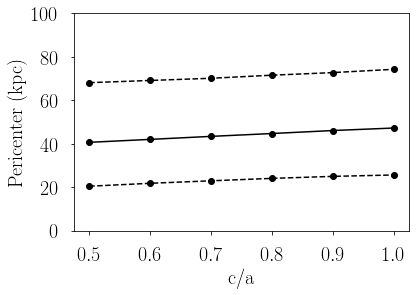

In [28]:
plt.plot(c_grid, p16,marker='o',color='black',label='16th Perc.',ls='--')
plt.plot(c_grid, p50,marker='o',color='black',label='50th Perc.',ls='-')
plt.plot(c_grid, p84,marker='o',color='black',label='84th Perc.',ls='--')

plt.xlabel('c/a',fontsize=20)
plt.ylabel('Pericenter (kpc)',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0,100)

(array([0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72]),
 <a list of 7 Text yticklabel objects>)

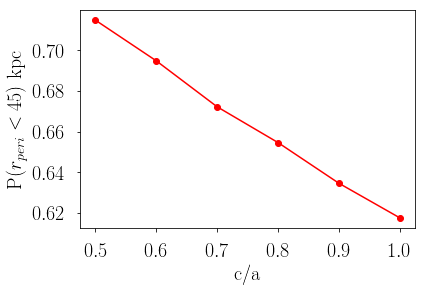

In [29]:
plt.plot(c_grid, peri45, marker='o',color='red')

plt.xlabel('c/a',fontsize=20)
plt.ylabel(r'P($r_{peri} < 45$) kpc',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


The probability of Hercules coming within 45 kpc of the Milky Way gets smaller as the halo becomes rounder.

# Monte Carlo simulation of the pericenter distance of Hercules for different flattening parameters. The simulation folds in the uncertainty in the proper motion of Hercules, the distance of Hercules, as well as the mass of the Milky Way halo.

In [4]:
np.random.seed(4747)

sampsize = 5000

dist_ar = np.random.normal(dist, dist_err, sampsize)
pmra_ar = np.random.normal(pmra, np.sqrt(np.square(pmra_e) + np.square(gaiasys)),sampsize)
pmde_ar = np.random.normal(pmdec, np.sqrt(np.square(pmdec_e) + np.square(gaiasys)), sampsize)

mass_ar = np.random.normal(1.3, 0.3, sampsize) 
c_grid = np.array([0.5,0.6,0.7,0.8,0.9,1.0]) 

In [8]:
ts = np.linspace(0,10,10000)*u.Gyr

peri_total = np.array([])
c_total = np.array([])
tr_total = np.array([]) # only for flat halo
eccen_total = np.array([]) # only for flat halo 

for k in range(c_grid.size):
    c = c_grid[k]
    
    tp_amp= potential.TriaxialNFWPotential(amp=1.,a=2.,c=c)
    mvir= tp_amp.mass(245./ro,245./ro,ro=ro,vo=vo)/10.**12. 

    c_arr = np.empty(sampsize)
    c_arr.fill(c)
    
    c_total = np.concatenate([c_total,c_arr])
    
    peri = np.empty(sampsize)
    tr = np.empty(sampsize)
    eccen = np.empty(sampsize)
    
    for i in range(sampsize):
    
        tp= potential.TriaxialNFWPotential(amp=mass_ar[i]/mvir,a=2.,c=c) 
        
        if i % 100 == 0:
            print(k, i)
        
        pot = [tp,bp,mp]

        orb = Orbit([ra*u.degree,
                     dec*u.degree,
                     dist_ar[i]*u.kpc,
                     pmra_ar[i]*u.mas/u.yr,
                     pmde_ar[i]*u.mas/u.yr,
                     vlos*u.km/u.s],
                    radec=True,solarmotion='Schoenrich',ro=ro*u.kpc,vo=vo*u.km/u.s)

        orb_flip = orb.flip() 
        orb_flip.integrate(ts,pot)

        peri[i] = orb_flip.rperi()
        
        if c > 0.95:
            tr[i] = orb_flip.Tr()
            eccen[i] = orb_flip.e()
        
    if c < 0.95:
        peri_total = np.concatenate([peri_total,peri])
        tr = np.empty(sampsize)
        tr.fill(np.nan)
        eccen = np.empty(sampsize)
        eccen.fill(np.nan)
        
        eccen_total = np.concatenate([eccen_total, eccen])
        tr_total = np.concatenate([tr_total, tr])
    else:
        peri_total = np.concatenate([peri_total,peri])
        tr_total = np.concatenate([tr_total,tr])
        eccen_total = np.concatenate([eccen_total, eccen])
    

0 0
0 100
0 200
0 300
0 400
0 500
0 600
0 700
0 800
0 900
0 1000
0 1100
0 1200
0 1300
0 1400
0 1500
0 1600
0 1700
0 1800
0 1900
0 2000
0 2100
0 2200
0 2300
0 2400
0 2500
0 2600
0 2700
0 2800
0 2900
0 3000
0 3100
0 3200
0 3300
0 3400
0 3500
0 3600
0 3700
0 3800
0 3900
0 4000
0 4100
0 4200
0 4300
0 4400
0 4500
0 4600
0 4700
0 4800
0 4900
1 0
1 100
1 200
1 300
1 400
1 500
1 600
1 700
1 800
1 900
1 1000
1 1100
1 1200
1 1300
1 1400
1 1500
1 1600
1 1700
1 1800
1 1900
1 2000
1 2100
1 2200
1 2300
1 2400
1 2500
1 2600
1 2700
1 2800
1 2900
1 3000
1 3100
1 3200
1 3300
1 3400
1 3500
1 3600
1 3700
1 3800
1 3900
1 4000
1 4100
1 4200
1 4300
1 4400
1 4500
1 4600
1 4700
1 4800
1 4900
2 0
2 100
2 200
2 300
2 400
2 500
2 600
2 700
2 800
2 900
2 1000
2 1100
2 1200
2 1300
2 1400
2 1500
2 1600
2 1700
2 1800
2 1900
2 2000
2 2100
2 2200
2 2300
2 2400
2 2500
2 2600
2 2700
2 2800
2 2900
2 3000
2 3100
2 3200
2 3300
2 3400
2 3500
2 3600
2 3700
2 3800
2 3900
2 4000
2 4100
2 4200
2 4300
2 4400
2 4500
2 4600
2 4700


In [9]:
# Saving this to a text file

mc_res = pd.DataFrame()

mc_res['Peri'] = peri_total
mc_res['c'] = c_total
mc_res['tr'] = tr_total
mc_res['e'] = eccen_total

mc_res.to_csv('herc_peric.txt',sep=',',index=False)